example

In [1]:
import numpy
import pandas
print(pandas.__version__)
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt
#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

1.1.5
0.11.0


In [2]:
# for legend
from matplotlib.patches import Rectangle

# for mean
import statistics 

In [3]:
with open("results_on_digital_ocean_random_starting_location_to_10.dat",'r') as file_handle:
    file_contents = file_handle.read()

results = {}
for line in file_contents.split("\n")[1:]:
    if len(line)==0:
        break
    line_as_list = line.split(',')
    rows = int(line_as_list[0])
    columns = int(line_as_list[1])
    time = float(line_as_list[2])
    failures = int(line_as_list[3])
    try:
        results[rows].append(time)
    except KeyError:
        results[rows] = []
        results[rows].append(time)

m_list = list(results.keys())

In [4]:
m_list

[5, 6, 7, 8, 9, 10]

In [5]:
#mean_centers = [0, .25, .5, .75]
#mean_centers = [0, .2, .4, .6, 0.8]
mean_centers = numpy.linspace(0,1,len(m_list)+1)[0:-1]

In [6]:
mean_centers

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333])

In [7]:
mean_values = []

for k, v in results.items():
    mean_values.append(statistics.mean(results[k]))

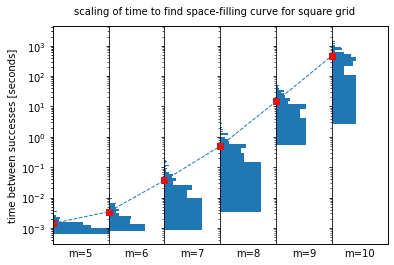

In [8]:
fig, axes = plt.subplots(1, len(m_list), sharey=True)

#fig = plt.figure()
# https://stackoverflow.com/a/57662283/1164295
ax_big = fig.add_subplot(111, facecolor="none")
axes[0].get_shared_y_axes().join(axes[0],ax_big)
ax_big.set_xlim((0, 1)) 

#ax_big.set_axisbelow(True)

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
ax_big.scatter(x=mean_centers, 
                   y =  mean_values,
                   marker='s', # https://matplotlib.org/api/markers_api.html
                   c='red')
ax_big.plot(mean_centers, mean_values,
            linestyle='dashed', # https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
            linewidth=1)
ax_big.tick_params(left=False, right=False, labelleft=False, labelright=False,
                bottom=False, labelbottom=False)

cmap = plt.get_cmap('jet')
f_colors = []
f_colors.append(cmap(0.25))
f_colors.append(cmap(0.8))

bin_count = 20
max_count_per_bin = 0
if True:
    for m_index, m_value in enumerate(m_list):
        # https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html
        count_per_bin, bin_center, h = axes[m_index].hist(
                           results[m_value], 
                           bins=bin_count, 
                           orientation="horizontal", 
                           #density=True, # don't use density because it hides the lack of data by relative height
#                           color=f_colors[f_index]);
        );
        max_count_per_bin = max(max_count_per_bin, max(count_per_bin))
        
# ensure every subplot uses the same x-axis
for ax in axes.flat:
    ax.set_xlim((0, max_count_per_bin))
    ax.set_yscale('log') # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_yscale.html


# https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html
for index, ax in enumerate(axes.flat):
    ax.set(xlabel='m='+str(m_list[index]), ylabel='time between successes [seconds]')
    ax.set(xticks=[])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    
fig.subplots_adjust(wspace=0, hspace=0)

# legend
# https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in f_colors]
#labels = ["f="+str(x) for x in f_list]
#plt.legend(handles, 
#           labels, 
#           bbox_to_anchor=(.9, .4),
#           bbox_transform=plt.gcf().transFigure)
# for manual inclusion of markers from scatter, see https://matplotlib.org/tutorials/intermediate/legend_guide.html

# title
fig.text(0.5, 0.95, 'scaling of time to find space-filling curve for square grid',
         horizontalalignment='center', verticalalignment='top');

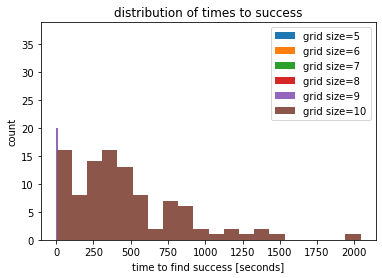

In [9]:
for m_index, m_value in enumerate(m_list):
    plt.hist(results[m_value], 
             bins=bin_count,
             #density=True, 
             label="grid size="+str(m_value))

plt.legend();
plt.xlabel('time to find success [seconds]');
plt.ylabel('count');
plt.title('distribution of times to success');

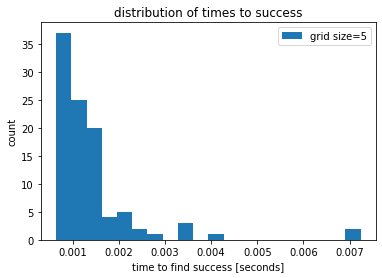

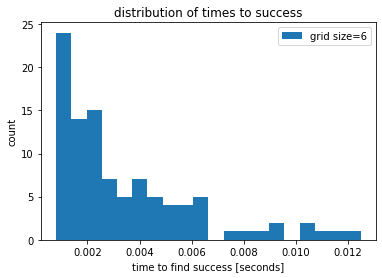

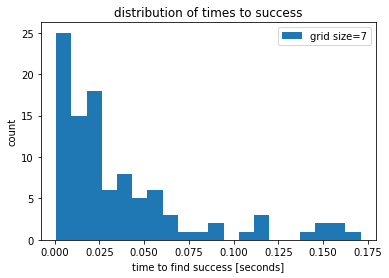

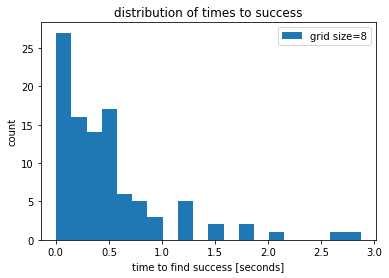

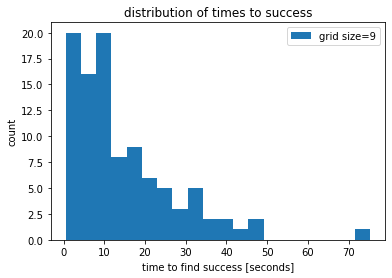

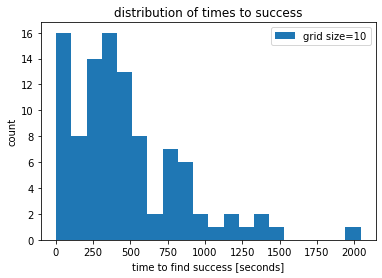

In [10]:
for m_index, m_value in enumerate(m_list):
    plt.hist(results[m_value], 
             bins=bin_count,
             #density=True, 
             label="grid size="+str(m_value))

    plt.legend();
    plt.xlabel('time to find success [seconds]');
    plt.ylabel('count');
    plt.title('distribution of times to success');
    plt.show();